# Understanding Descriptive Statistics

Import the necessary libraries here:

In [3]:
# Libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [4]:
# your code here
dice_roll = random.choices(range(1,7), k=10)
dice_roll_df = pd.DataFrame(dice_roll)

#### 2.- Plot the results sorted by value.

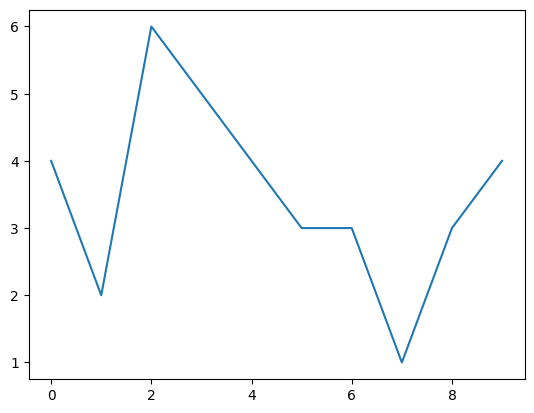

In [5]:
# your code here
plt.plot(dice_roll_df)
plt.show()


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

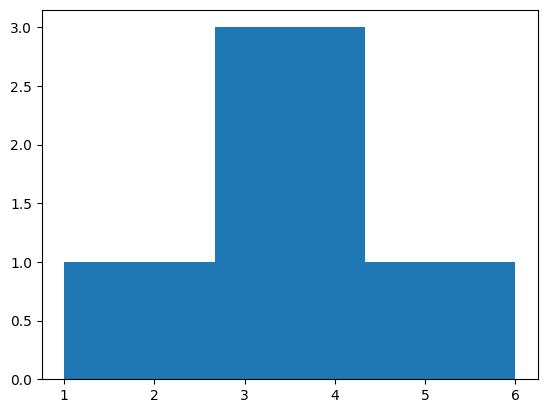

In [6]:
# your code here
plt.hist(dice_roll_df, bins=6)
plt.show()

"""
your comments here
"""

The plot above shows cumulative results while the frequency distribution histogram shows absolute number of values.

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [49]:
# your code here
def ft_mean(lst):
	return lst[0].sum() / len(lst)

ft_mean(dice_roll_df)

3.5

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [8]:
# your code here

def ih_mean(df):
	total_sum = 0
	for i in range(1,len(df.value_counts()) + 1):
		total_sum += df.value_counts().index[i - 1][0] * df.value_counts()[df.value_counts().index[i - 1][0]]
	return(total_sum/len(df))

ih_mean(dice_roll_df)



3.5

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [9]:
# your code here
def ft_median(lst):
	lst.sort()
	if len(lst) % 2 == 1:
		return(lst[int(len(lst)/2)])
	else:
		return((lst[int(len(lst)/2) - 1] + lst[int(len(lst)/2) ]) / 2)
		

ft_median(dice_roll)

3.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [10]:
# your code here

dice_roll = [1,2,3]
def ft_quartiles(lst):
	# creates return list
	ret_lst = []
	# populates it, so we can assign values non-consecutively
	nr_of_quartiles = 4
	for i in range(nr_of_quartiles):
		ret_lst.append(0)
	lst.sort()
	# calculates the 25% and 75% percentiles
	if len(lst) % 4 != 0:
		ret_lst[0] = lst[int(len(lst)/4 + 1) - 1]
		ret_lst[2] = lst[int(len(lst) * (3/4))]
	else:
		ret_lst[0] = ft_median([lst[int(len(lst)/4) - 1],lst[int(len(lst)/4)]])
		ret_lst[2] = ft_median([lst[int(len(lst) * (3/4) - 1)], lst[int(len(lst) * (3/4))]])
	#sets the median, ie, the 50% percentile
	ret_lst[1] = ft_median(lst)
	#100% percentile (last value)
	ret_lst[3] = lst[len(lst) - 1]
	return(ret_lst)

print(ft_quartiles(dice_roll))
print(np.quantile(dice_roll, [0.25, 0.5, 0.75, 1]))

"""
Couldn't get it to work, but José just said
we weren't supposed to do it, so ¯\_(ツ)_/¯ """

[1, 2, 3, 3]
[1.5 2.  2.5 3. ]


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [11]:
# your code here

roll_dice_100 = pd.read_csv("../data/roll_the_dice_hundred.csv")
roll_dice_100.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


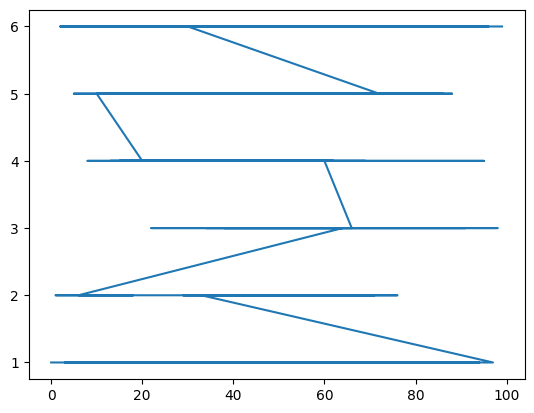

In [36]:
roll_dice_100.sort_values(by="value", inplace=True)
plt.plot(roll_dice_100["value"])
plt.show()

In [37]:
"""
I see a graph that makes absolutely no sense
"""

'\nI see a graph that makes absolutely no sense\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [50]:
# your code here

def ft_mean(lst):
	"""Function had to be re-written as it wasn't working"""
	return lst.sum() / len(lst)
ft_mean(roll_dice_100["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


In [53]:
# your code here
roll_dice_100["value"].value_counts()

6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

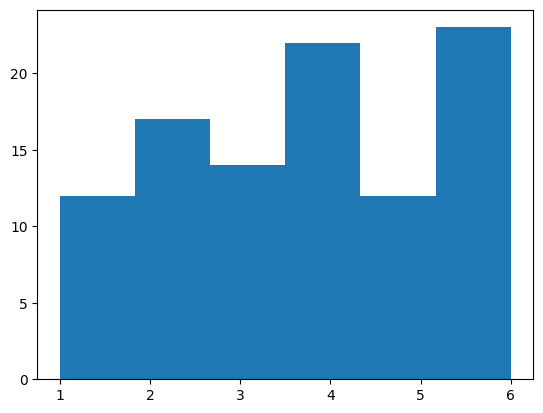

In [57]:
# your code here
plt.hist(roll_dice_100["value"], bins=6)
plt.show()

In [17]:
"""
I see a distribution with a higher than expected proportion of 4s and 6s. This explains why the mean (3.74) has a 
value higher than the expected value of 3.5.as_integer_ratio
Given the limited sample size, nothing can be said about the fairness of the die
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [58]:
# your code here
roll_the_dice_1k = pd.read_csv("../data/roll_the_dice_thousand.csv")
roll_the_dice_1k.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


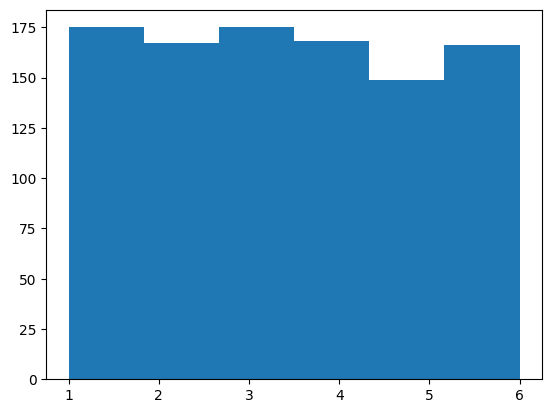

In [61]:
plt.hist(roll_the_dice_1k["value"], bins=6)
plt.show()

In [19]:
"""
The bars are more equal in size, which is only natural, given the increased size of the sample.

It is still too small, however, to draw any meaningful conclusions.
"""

'\nyour comments here\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [62]:
# your code here
ages_population = pd.read_csv("../data/ages_population.csv")
ages_population.head()

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0


observation
39.0           45
41.0           36
30.0           34
35.0           33
43.0           32
               ..
69.0            1
70.0            1
71.0            1
73.0            1
82.0            1
Length: 72, dtype: int64


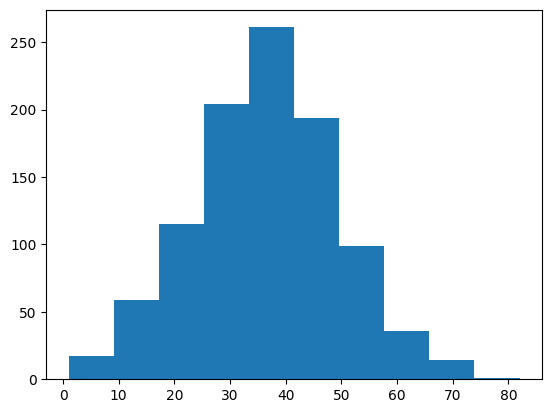

In [63]:
print(ages_population.value_counts())
plt.hist(ages_population)
plt.show()

In [ ]:
"""
The shape of the histogram is consistent with the normal distribution.
I'm guessing the mean is in the high 30s (37-39) and given that 95% of the distribution should fall inside
two standard deviations, I'll estimate that at about 15"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [68]:
# your code here
print("Mean -", np.mean(ages_population, axis=0), "Standard deviation:", np.std(ages_population))

Mean - observation    36.56
dtype: float64 Standard deviation: observation    12.81009
dtype: float64


In [22]:
"""
My estimates were a bit too high, but not that far from real values
"""

'\nyour comments here\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [69]:
# your code here

ages_pop2 = pd.read_csv("../data/ages_population2.csv")
ages_pop2.head()

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0


observation
28.0           139
27.0           125
26.0           120
29.0           115
25.0            98
30.0            90
24.0            78
31.0            61
23.0            41
22.0            35
32.0            31
33.0            22
21.0            17
20.0            13
34.0             7
35.0             3
19.0             3
36.0             2
dtype: int64


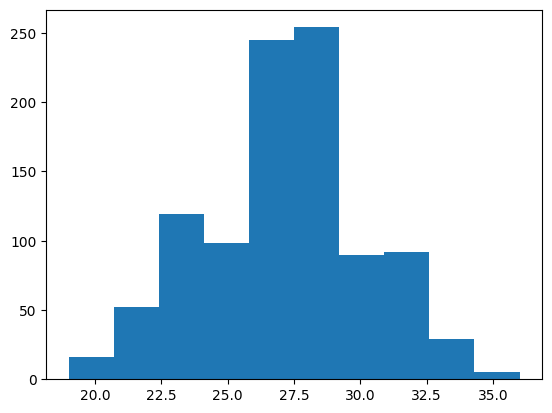

In [70]:
print(ages_pop2.value_counts())
plt.hist(ages_pop2)
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [24]:
"""
The range is much tighter (about 18 - 37) while in the other one it went from little more than 0 to the mid-70s.
Also, the observations are much more concentrated in the central values, clustering around 27-28.
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [71]:
# your code here
print("Mean -", np.mean(ages_pop2, axis=0), "Standard deviation:", np.std(ages_pop2))

Mean - observation    27.155
dtype: float64 Standard deviation: observation    2.968329
dtype: float64


In [26]:
"""
My estimates for the mean were pretty much spot-on. The low value of the standard deviation
just confirms that this is an area with a demographic very concentrated in only a few age groups
(namely the late 20s).
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [76]:
# your code here
ages_pop3 = pd.read_csv("../data/ages_population3.csv")
ages_pop3.head()

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0


observation
32.0           37
37.0           31
35.0           31
39.0           29
36.0           26
               ..
8.0             1
7.0             1
5.0             1
76.0            1
1.0             1
Length: 75, dtype: int64


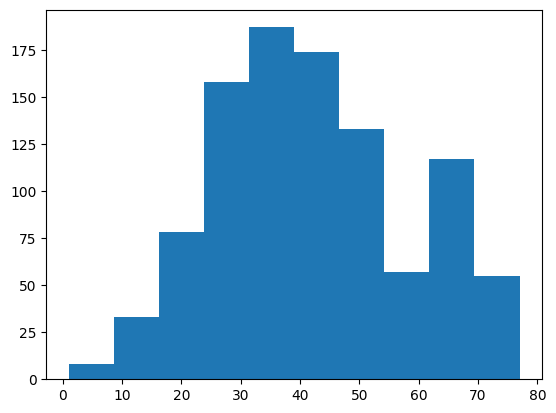

In [77]:
print(ages_pop3.value_counts())
plt.hist(ages_pop3)
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
# your code here
print("Mean -", np.mean(ages_pop3, axis=0), "Standard deviation:", np.std(ages_pop3))

Mean - observation    41.989
dtype: float64 Standard deviation: observation    16.136632
dtype: float64


In [29]:
"""
This is a neighbourhood with an older population, as the distribution is clearly left skewed,
although the standard deviation tells us there are people of all ages living there
"""

'\nyour comments here\n'

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [83]:
# your code here

print(np.quantile(ages_pop3, [0.25, 0.5, 0.75, 1]))

print(np.median(ages_pop3) - np.mean(ages_pop3, axis=0))

[30. 40. 53. 77.]
observation   -1.989
dtype: float64


In [31]:
"""
As is characteristic of a left skewed distribution the mean is higher than the median. That, associated with the quantiles
clearly defines this neighbourhood as one with older residents, compared with the other two
"""

'\nyour comments here\n'

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [89]:
# your code here
print(np.quantile(ages_population, [0.1, 0.5, 0.9]))
print(np.quantile(ages_pop3, [0.1, 0.5, 0.9]))

[20. 37. 53.]
[22. 40. 67.]


In [33]:
"""
Comparing the 10 and 90% percentiles with the ones in neighbourhood 1 (the one most resembling a normal distribution)
we see that that, while the population under 20 is roughly the same, the 90% percentile is much higher in neighbourhood 3.
Both the averages (and means) are similar, even if slightly higher, which seems to show that the people who are in the older spectrum
are much older than in other similar neighbourhoods (or, at least, neighbourhood 1)
"""

'\nyour comments here\n'

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [34]:
# your code here

In [35]:
"""
your comments here
"""

'\nyour comments here\n'